# Comparision of Pro Se cases by county

### Set up environment

In [1]:
!pip install oscn==0.0.0.25

import oscn

### Set up the OSCN information needed

In [2]:

years = ['2016','2017','2018']
counties = ['mayes', 'love','rogers','delaware']
types =['CM','CF']



### Request the cases from OSCN and save as files
This takes a couple hours

In [3]:
import pickle


# for county in counties:
#   for year in years:
#     for type in types:      
#       cases=oscn.request.CaseList(type=type, year=year,county=county)
#       all_cases = [c for c in cases]
#       file_name = f'data/{type}.{county}.{year}.oscn'
#       f = open(file_name, 'wb')
#       pickle.dump(all_cases, f)
#       f.close()
#       print(f'{file_name}: {len(all_cases)}')


### Retrieve the saved files

In [4]:
import pickle

case_count =0 
saved_cases = []
for county in counties:
  for year in years:
    for type in types:      
      file_name = f'data/{type}.{county}.{year}.oscn'
      new_cases = pickle.load(open(file_name, 'rb'))
      new_case_count = len(new_cases)
      case_count += new_case_count
      print(f'{file_name} added {new_case_count}')
      saved_cases += new_cases
        
print(f'counted case: {case_count} length saved {len(saved_cases)}')


data/CM.mayes.2016.oscn added 535
data/CF.mayes.2016.oscn added 512
data/CM.mayes.2017.oscn added 632
data/CF.mayes.2017.oscn added 425
data/CM.mayes.2018.oscn added 392
data/CF.mayes.2018.oscn added 277
data/CM.love.2016.oscn added 636
data/CF.love.2016.oscn added 339
data/CM.love.2017.oscn added 766
data/CF.love.2017.oscn added 305
data/CM.love.2018.oscn added 593
data/CF.love.2018.oscn added 212
data/CM.rogers.2016.oscn added 1116
data/CF.rogers.2016.oscn added 1107
data/CM.rogers.2017.oscn added 1114
data/CF.rogers.2017.oscn added 1060
data/CM.rogers.2018.oscn added 924
data/CF.rogers.2018.oscn added 592
data/CM.delaware.2016.oscn added 750
data/CF.delaware.2016.oscn added 444
data/CM.delaware.2017.oscn added 935
data/CF.delaware.2017.oscn added 439
data/CM.delaware.2018.oscn added 741
data/CF.delaware.2018.oscn added 357
counted case: 15203 length saved 15203


## Create a pandas dataframe
This takes several minutes to run.
The first cell creates the basic dataframe
Then next cells add the columns for reporting

In [5]:
import numpy as np
import pandas as pd

columns = ['Filed','County','Type','Judge','Case Number', 'Source']
case_data = lambda c: [c.filed, c.county, c.type, c.judge,  c.case_number, c.source]
%time all_cases = pd.DataFrame([case_data(c) for c in saved_cases], columns = columns)
all_cases.describe()


CPU times: user 1.42 s, sys: 21.9 ms, total: 1.44 s
Wall time: 1.45 s


,Filed,County,Type,Judge,Case Number,Source
count,15126,15203,15203,15203,15203,15203
unique,675,4,2,18,6256,15203
top,2017-04-25 00:00:00,rogers,CM,UNASSIGNED,CM-2016-425,https://www.oscn.net/dockets/GetCaseInformatio...
freq,66,5913,9037,3708,4,1
first,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN


In [6]:
def get_first_count(row):
#   row.name is the row's index
    case = saved_cases[row.name]
    try:
      first_count = case.counts[0]['description']
    except:
      first_count = 'unknown' 
    return first_count

all_cases['FirstCount'] =  all_cases.apply(get_first_count, axis=1)
all_cases.head()

,Filed,County,Type,Judge,Case Number,Source,FirstCount
0,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-1,https://www.oscn.net/dockets/GetCaseInformatio...,POSSESSION OF CONTROLLED SUBSTANCE (MARIJUANA)
1,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-2,https://www.oscn.net/dockets/GetCaseInformatio...,PUBLIC INTOXICATION
2,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-3,https://www.oscn.net/dockets/GetCaseInformatio...,"DRIVING UNDER THE INFLUENCE - AGGRAVATED, in v..."
3,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-4,https://www.oscn.net/dockets/GetCaseInformatio...,POSSESSION OF CONTROLLED SUBSTANCE (MARIJUANA)
4,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-5,https://www.oscn.net/dockets/GetCaseInformatio...,DRIVING UNDER THE INFLUENCE - ALCOHOL


In [7]:
import re

# this is the regex for finding pro se cases
pro_se_re = re.compile(r'(waive.*right.*attorney|represented.*pro se)', re.I | re.M)

# this function determines if a case is Pro Se or not
def is_pro_se(row):
    case = saved_cases[row.name]
# First see if the Pro Se text is anywhere on the page to speed up processing
    if pro_se_re.search(case.text):
        if case.docket:
            for minute in case.docket:
                if pro_se_re.search(minute.description):
                    return True
    return False

all_cases['Pro_Se'] = all_cases.apply(is_pro_se, axis=1)


In [8]:
# convert the date from a string to a ptyhon DateTime type
all_cases['FiledDate'] = pd.to_datetime(all_cases['Filed'])


## General description of the data

In [9]:

all_cases.describe()

,Filed,County,Type,Judge,Case Number,Source,FirstCount,Pro_Se,FiledDate
count,15126,15203,15203,15203,15203,15203,15203,15203,15126
unique,675,4,2,18,6256,15203,2066,2,675
top,2017-04-25 00:00:00,rogers,CM,UNASSIGNED,CM-2016-425,https://www.oscn.net/dockets/GetCaseInformatio...,"POSSESSION OF CONTROLLED DANGEROUS SUBSTANCE,",False,2017-04-25 00:00:00
freq,66,5913,9037,3708,4,1,853,14684,66
first,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-04 00:00:00
last,2018-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-10 00:00:00


In [10]:

all_cases.head(10)

,Filed,County,Type,Judge,Case Number,Source,FirstCount,Pro_Se,FiledDate
0,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-1,https://www.oscn.net/dockets/GetCaseInformatio...,POSSESSION OF CONTROLLED SUBSTANCE (MARIJUANA),False,2016-01-04
1,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-2,https://www.oscn.net/dockets/GetCaseInformatio...,PUBLIC INTOXICATION,False,2016-01-04
2,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-3,https://www.oscn.net/dockets/GetCaseInformatio...,"DRIVING UNDER THE INFLUENCE - AGGRAVATED, in v...",False,2016-01-04
3,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-4,https://www.oscn.net/dockets/GetCaseInformatio...,POSSESSION OF CONTROLLED SUBSTANCE (MARIJUANA),False,2016-01-04
4,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-5,https://www.oscn.net/dockets/GetCaseInformatio...,DRIVING UNDER THE INFLUENCE - ALCOHOL,False,2016-01-04
5,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-6,https://www.oscn.net/dockets/GetCaseInformatio...,DRIVING UNDER THE INFLUENCE - ALCOHOL,False,2016-01-04
6,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-7,https://www.oscn.net/dockets/GetCaseInformatio...,DRIVING UNDER THE INFLUENCE - DRUGS,False,2016-01-04
7,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-8,https://www.oscn.net/dockets/GetCaseInformatio...,PUBLIC INTOXICATION,False,2016-01-04
8,2016-01-04,mayes,CM,UNASSIGNED,CM-2016-9,https://www.oscn.net/dockets/GetCaseInformatio...,PUBLIC INTOXICATION,False,2016-01-04
9,2016-01-05,mayes,CM,UNASSIGNED,CM-2016-10,https://www.oscn.net/dockets/GetCaseInformatio...,SKIPPED,False,2016-01-05


### Count of all cases by county and type 

In [11]:
year = all_cases.FiledDate.dt.to_period("Y")

all_cases.groupby(['County']).count()['Filed']

County
delaware    3666
love        2851
mayes       2770
rogers      5839
Name: Filed, dtype: int64

### Case count by type, county, and judge

In [12]:
all_cases.groupby(['County','Judge'])['Type'].value_counts()

County    Judge                 Type
delaware  DENNEY, BARRY         CM       101
                                CF        77
          HANEY, ROBERT G       CF       134
                                CM        62
          LITTLEFIELD, ALICIA   CM      1441
                                CF      1010
          UNASSIGNED            CM       725
                                CF       116
love      COPPEDGE, WALLACE     CF       245
                                CM       166
          CORBIN,  LAURA J      CM         2
          HICKS,  TODD          CM      1798
                                CF       592
          JOHNSON,  GREG        CF        12
                                CM         4
          MIGLIORINO,  CHARLES  CM         3
                                CF         1
          ROBERTS,  CHARLES E   CF         2
                                CM         2
          UNASSIGNED            CM        20
                                CF         4
mayes     CROSSON,

### Count of Pro Se cases by county and year

In [13]:
all_cases.groupby(['County',year])['Pro_Se'].value_counts()

County    FiledDate  Pro_Se
delaware  2016       False     1045
                     True       149
          2017       False     1163
                     True       211
          2018       False      990
                     True       108
love      2016       False      975
          2017       False     1071
          2018       False      805
mayes     2016       False     1046
                     True         1
          2017       False     1054
          2018       False      669
rogers    2016       False     2137
                     True        33
          2017       False     2141
                     True        16
          2018       False     1511
                     True         1
Name: Pro_Se, dtype: int64

### Count of Pro Se cases by county, judge and type


In [14]:
pro_se_cases = all_cases.query("Pro_Se == True")
pro_se_cases.groupby(['County','Judge'])['Type'].value_counts()

County    Judge                Type
delaware  DENNEY, BARRY        CM       19
          HANEY, ROBERT G      CM       10
          LITTLEFIELD, ALICIA  CM      399
                               CF       23
          UNASSIGNED           CM       17
mayes     UNASSIGNED           CM        1
rogers    CROSSON, TERRELL S   CM       16
          STEIDLEY, J          CF       34
Name: Type, dtype: int64

### Graph of Pro Se case count by judge

In [15]:
import matplotlib.pyplot as plt
pro_se_cases['Judge'].value_counts().plot.bar()

### Pro Se Cases by county, judge, and type

In [16]:
pro_se_cases.groupby(['County','Judge'])['Type'].value_counts()

County    Judge                Type
delaware  DENNEY, BARRY        CM       19
          HANEY, ROBERT G      CM       10
          LITTLEFIELD, ALICIA  CM      399
                               CF       23
          UNASSIGNED           CM       17
mayes     UNASSIGNED           CM        1
rogers    CROSSON, TERRELL S   CM       16
          STEIDLEY, J          CF       34
Name: Type, dtype: int64

### Percentage Pro Se by Year, County and Type

In [17]:
year = all_cases.FiledDate.dt.to_period("Y")

groups = [year,'County','Type']
round(pro_se_cases.groupby(groups).size()/all_cases.groupby(groups).size()*100,2)


FiledDate  County    Type
2016       delaware  CF       2.15
                     CM      19.09
           love      CF        NaN
                     CM        NaN
           mayes     CF        NaN
                     CM       0.19
           rogers    CF       1.73
                     CM       1.31
2017       delaware  CF       2.08
                     CM      22.51
           love      CF        NaN
                     CM        NaN
           mayes     CF        NaN
                     CM        NaN
           rogers    CF       1.32
                     CM       0.18
2018       delaware  CF       0.77
                     CM      14.83
           love      CF        NaN
                     CM        NaN
           mayes     CF        NaN
                     CM        NaN
           rogers    CF       0.17
                     CM        NaN
dtype: float64

### Percentage Pro Se by Year, Type, and Judge

In [18]:
year = all_cases.FiledDate.dt.to_period("Y")

groups = [year,'Type','Judge']
round(pro_se_cases.groupby(groups).size()/all_cases.groupby(groups).size()*100,2)


FiledDate  Type  Judge               
2016       CF    COPPEDGE, WALLACE         NaN
                 DENNEY, BARRY             NaN
                 HANEY, ROBERT G           NaN
                 HICKS,  TODD              NaN
                 JOHNSON,  GREG            NaN
                 LITTLEFIELD, ALICIA      2.70
                 MCBRIDE, TERRY H          NaN
                 MIGLIORINO,  CHARLES      NaN
                 ROBERTS,  CHARLES E       NaN
                 STEIDLEY, J              1.73
                 TAYLOR,  SHAWN S          NaN
                 UNASSIGNED                NaN
           CM    COPPEDGE, WALLACE         NaN
                 CROSSON,  TERRELL S       NaN
                 CROSSON, TERRELL S       1.31
                 DENNEY, BARRY           16.13
                 HANEY, ROBERT G          9.52
                 HICKS,  TODD              NaN
                 JOHNSON,  GREG            NaN
                 LITTLEFIELD, ALICIA     28.19
                 MIGLI

### History of Percentage CM Pro Se cases in Delaware County
### (January 2017 - August 2018)

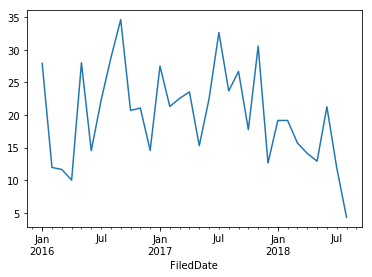

In [19]:
month = all_cases.FiledDate.dt.to_period("M")

delaware_cases = all_cases.query("County == 'delaware'").query("Type == 'CM'")
delaware_pro_se_cases = delaware_cases.query("Pro_Se == True")
groups = [month]
by_month=round(delaware_pro_se_cases.groupby(groups).size()/delaware_cases.groupby(groups).size()*100,2)
by_month.plot.line()

In [20]:
delaware_pro_se_cases.to_csv('pro_se_cases.csv')
